In [1]:
# default_exp visuals

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
# export
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.style.use('ggplot')
plt.style.use(['dark_background'])

import numpy as np
import pandas as pd

In [23]:
#export
def create_cdf(series):
    # using the assumption that a cont variable probably doesn't have any repeats (or at least not too many, lets just rank them and say
    # that if there are any duplicates it will average their rank)
    cdf_series = series.rank(method = 'average', pct = True)
    cdf_series.index = series
    return cdf_series


def plot_hist_and_cdf(df, col, bins=100, figsize= (15,3), axes = None):
    # in case you wanted to pass two ax objects instead of creating them
    if axes is None: fig, (ax1, ax2) = plt.subplots(1,2, figsize = figsize)
    # hist (pdf viz approx)
    df[col].hist(bins = bins, ax = ax1)
    # create cdf series, sort it, and plot it
    cdf_series = create_cdf(df[col])
    cdf_series.sort_values().plot(ax = ax2)
    # return all that was created
    return fig, (ax1, ax2), cdf_series

In [24]:
N = 1000
n_feats = 4
fake_data = np.random.normal(size=(N, n_feats))

feat_cols = [f'col{i}' for i in range(n_feats)]
df = pd.DataFrame(fake_data,columns=feat_cols)

target_col = 'label'
p = 0.4
df[target_col] = np.random.choice(a=[0, 1], size=(N, 1), p=[p, 1-p])

df.head()

,col0,col1,col2,col3,label
0,-1.399484,0.820140,-1.700726,-0.082566,0
1,0.398978,1.138259,0.327214,0.929395,1
2,-0.477207,0.182435,0.582282,0.607353,1
3,1.527134,0.871324,-1.952572,0.882938,1
4,0.199880,0.756995,1.326916,-1.590039,1


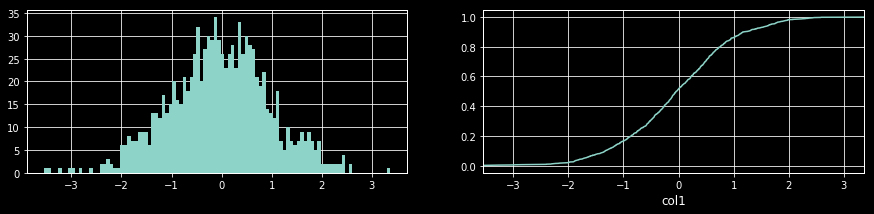

In [25]:
fig, (ax1, ax2), cdf_series = plot_hist_and_cdf(df, 'col1')